## How the data look like

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import poisson, expon, norm 

In [2]:
df = pd.read_csv('aerofit_treadmill.csv')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [4]:
df.shape

(180, 9)

In [6]:
df.ndim

2

In [7]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

# Finding the Outliers

## Income column

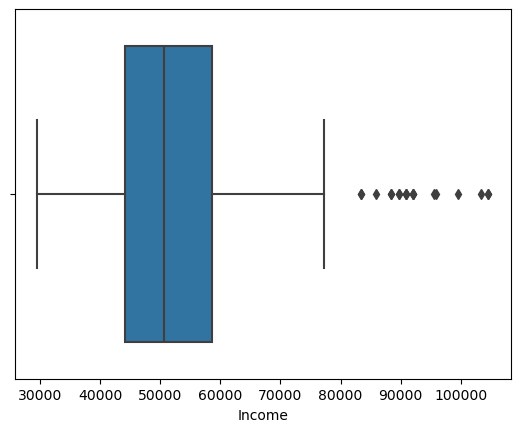

In [8]:
sns.boxplot(data = df, x = 'Income')
plt.show()

In [9]:
q1 = df['Income'].quantile(0.25)
q3 = df['Income'].quantile(0.75)
IQR = q3 - q1
df[(df['Income'] < (q1 - 1.5*IQR)) | (df['Income'] > (q3 + 1.5*IQR))]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
159,KP781,27,Male,16,Partnered,4,5,83416,160
160,KP781,27,Male,18,Single,4,3,88396,100
161,KP781,27,Male,21,Partnered,4,4,90886,100
162,KP781,28,Female,18,Partnered,6,5,92131,180
164,KP781,28,Male,18,Single,6,5,88396,150
166,KP781,29,Male,14,Partnered,7,5,85906,300
167,KP781,30,Female,16,Partnered,6,5,90886,280
168,KP781,30,Male,18,Partnered,5,4,103336,160
169,KP781,30,Male,18,Partnered,5,5,99601,150
170,KP781,31,Male,16,Partnered,6,5,89641,260


## For age column

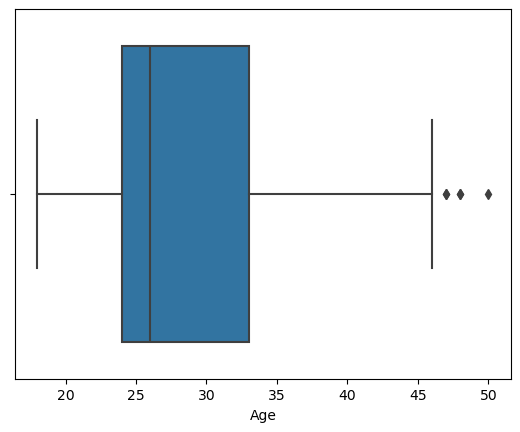

In [10]:
sns.boxplot(data = df, x = 'Age')
plt.show()

In [11]:
q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)
IQR = q3 - q1
df[(df['Age'] < (q1 - 1.5*IQR)) | (df['Age'] > (q3 + 1.5*IQR))]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
78,KP281,47,Male,16,Partnered,4,3,56850,94
79,KP281,50,Female,16,Partnered,3,3,64809,66
139,KP481,48,Male,16,Partnered,2,3,57987,64
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


## For Miles Column

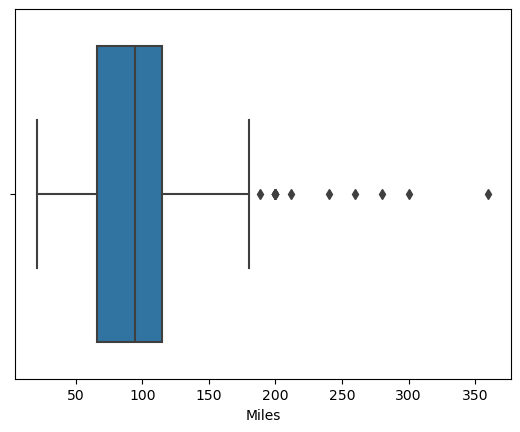

In [12]:
sns.boxplot(data = df, x = 'Miles')
plt.show()

In [13]:
q1 = df['Miles'].quantile(0.25)
q3 = df['Miles'].quantile(0.75)
IQR = q3 - q1
df[(df['Miles'] < (q1 - 1.5*IQR)) | (df['Miles'] > (q3 + 1.5*IQR))]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
23,KP281,24,Female,16,Partnered,5,5,44343,188
84,KP481,21,Female,14,Partnered,5,4,34110,212
142,KP781,22,Male,18,Single,4,5,48556,200
148,KP781,24,Female,16,Single,5,5,52291,200
152,KP781,25,Female,18,Partnered,5,5,61006,200
155,KP781,25,Male,18,Partnered,6,5,75946,240
166,KP781,29,Male,14,Partnered,7,5,85906,300
167,KP781,30,Female,16,Partnered,6,5,90886,280
170,KP781,31,Male,16,Partnered,6,5,89641,260
171,KP781,33,Female,18,Partnered,4,5,95866,200


## For Usage column

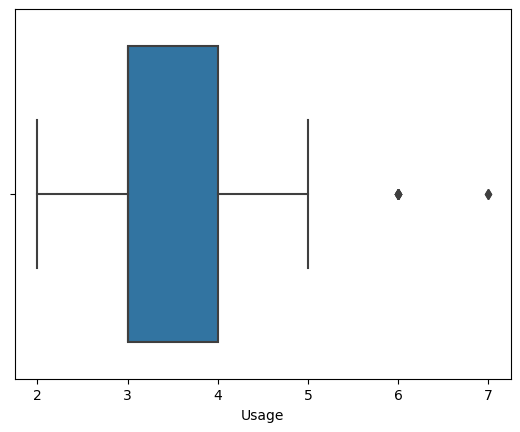

In [14]:
sns.boxplot(data = df, x = 'Usage')
plt.show()

In [15]:
q1 = df['Usage'].quantile(0.25)
q3 = df['Usage'].quantile(0.75)
IQR = q3 - q1
df[(df['Usage'] < (q1 - 1.5*IQR)) | (df['Usage'] > (q3 + 1.5*IQR))]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
154,KP781,25,Male,18,Partnered,6,4,70966,180
155,KP781,25,Male,18,Partnered,6,5,75946,240
162,KP781,28,Female,18,Partnered,6,5,92131,180
163,KP781,28,Male,18,Partnered,7,5,77191,180
164,KP781,28,Male,18,Single,6,5,88396,150
166,KP781,29,Male,14,Partnered,7,5,85906,300
167,KP781,30,Female,16,Partnered,6,5,90886,280
170,KP781,31,Male,16,Partnered,6,5,89641,260
175,KP781,40,Male,21,Single,6,5,83416,200


## For Fitness column

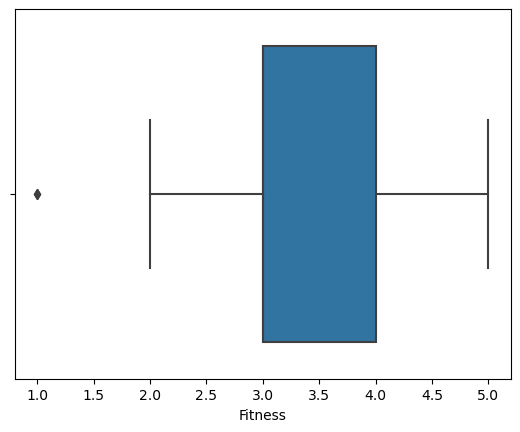

In [16]:
sns.boxplot(data = df, x = 'Fitness')
plt.show()

In [17]:
q1 = df['Fitness'].quantile(0.25)
q3 = df['Fitness'].quantile(0.75)
IQR = q3 - q1
df[(df['Fitness'] < (q1 - 1.5*IQR)) | (df['Fitness'] > (q3 + 1.5*IQR))]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
14,KP281,23,Male,16,Partnered,3,1,38658,47
117,KP481,31,Female,18,Single,2,1,65220,21


## For Education column

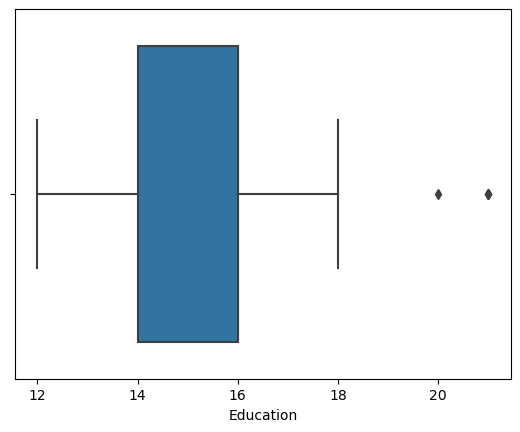

In [18]:
sns.boxplot(data = df, x = 'Education')
plt.show()

In [19]:
q1 = df['Education'].quantile(0.25)
q3 = df['Education'].quantile(0.75)
IQR = q3 - q1
df[(df['Education'] < (q1 - 1.5*IQR)) | (df['Education'] > (q3 + 1.5*IQR))]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
156,KP781,25,Male,20,Partnered,4,5,74701,170
157,KP781,26,Female,21,Single,4,3,69721,100
161,KP781,27,Male,21,Partnered,4,4,90886,100
175,KP781,40,Male,21,Single,6,5,83416,200


# Clipping the Data

In [20]:
minn = np.percentile(df['Income'], 5)
maxx = np.percentile(df['Income'], 95)
df['Income'] = np.clip(df['Income'], minn, maxx)

In [21]:
minn1 = np.percentile(df['Age'], 5)
maxx1 = np.percentile(df['Age'], 95)
df['Age'] = np.clip(df['Age'], minn1, maxx1)

In [22]:
minn2 = np.percentile(df['Education'], 5)
maxx2 = np.percentile(df['Education'], 95)
df['Education'] = np.clip(df['Education'], minn2, maxx2)

In [23]:
minn3 = np.percentile(df['Fitness'], 5)
maxx3 = np.percentile(df['Fitness'], 95)
df['Fitness'] = np.clip(df['Fitness'], minn3, maxx3)

In [24]:
minn4 = np.percentile(df['Miles'], 5)
maxx4 = np.percentile(df['Miles'], 95)
df['Miles'] = np.clip(df['Miles'], minn4, maxx4)

In [25]:
minn5 = np.percentile(df['Usage'], 5)
maxx5 = np.percentile(df['Usage'], 95)
df['Usage'] = np.clip(df['Usage'], minn5, maxx5)

## Univariate Analysis

<Axes: xlabel='Product', ylabel='count'>

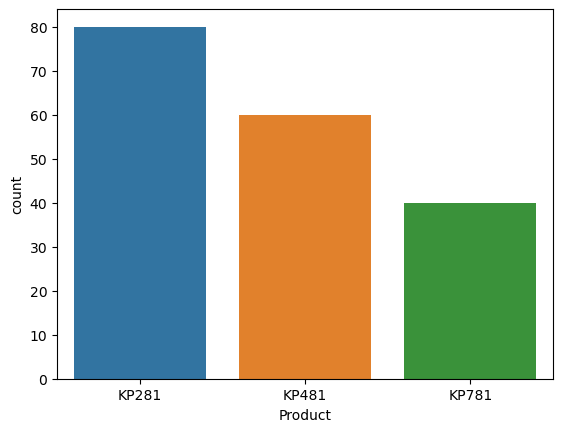

In [65]:
sns.countplot(data = df, x = 'Product')

## Bivariate Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

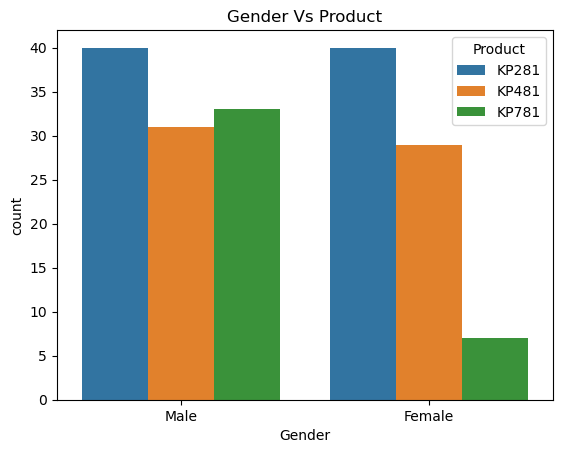

In [26]:
sns.countplot(data = df, x = 'Gender', hue = 'Product')
plt.title('Gender Vs Product')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

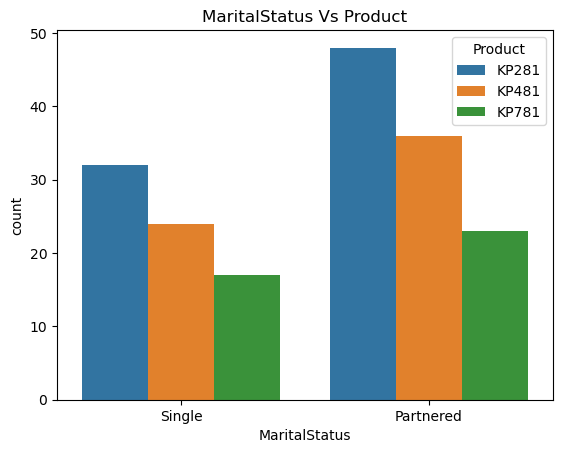

In [27]:
sns.countplot(data = df, x = 'MaritalStatus', hue = 'Product')
plt.title('MaritalStatus Vs Product')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

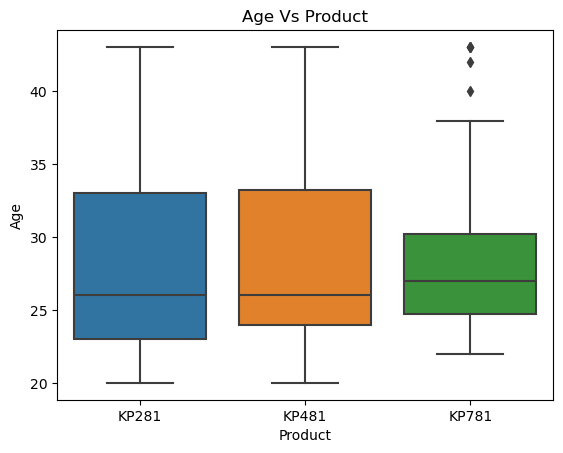

In [28]:
sns.boxplot(data = df, x = 'Product', y = 'Age')
plt.title('Age Vs Product')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

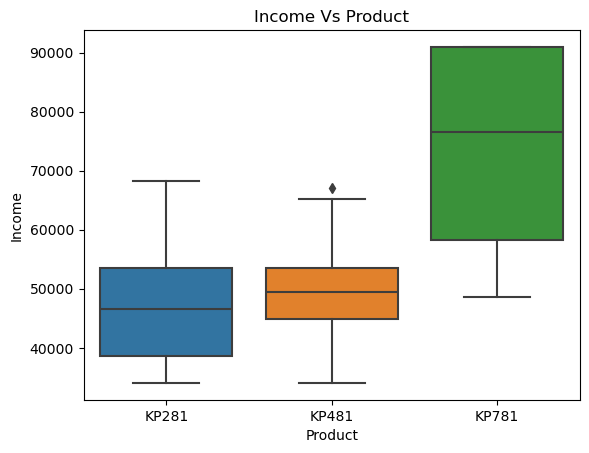

In [29]:
sns.boxplot(data = df, x = 'Product', y = 'Income')
plt.title('Income Vs Product')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

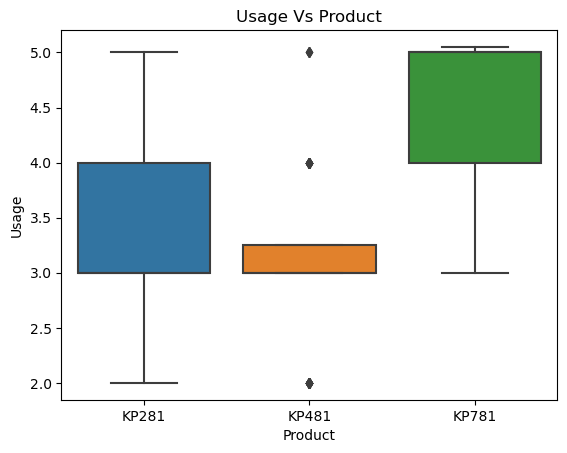

In [30]:
sns.boxplot(data = df, x = 'Product', y = 'Usage')
plt.title('Usage Vs Product')
plt.show

# Representing the Probability

In [31]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,20.0,Male,14.0,Single,3.0,4.0,34053.15,112.0
1,KP281,20.0,Male,15.0,Single,2.0,3.0,34053.15,75.0
2,KP281,20.0,Female,14.0,Partnered,4.0,3.0,34053.15,66.0
3,KP281,20.0,Male,14.0,Single,3.0,3.0,34053.15,85.0
4,KP281,20.0,Male,14.0,Partnered,4.0,2.0,35247.00,47.0


In [32]:
crosstab1 = pd.crosstab(index = df['Product'], columns = 'count', normalize = True)
crosstab1

col_0,count
Product,
KP281,0.444444
KP481,0.333333
KP781,0.222222


## Products and Gender

In [33]:
pd.crosstab(index = df['Gender'], columns = df['Product'], margins = True, normalize = True)

Product,KP281,KP481,KP781,All
Gender,,,,
Female,0.222222,0.161111,0.038889,0.422222
Male,0.222222,0.172222,0.183333,0.577778
All,0.444444,0.333333,0.222222,1.000000


## Product and MartialStatus

In [34]:
pd.crosstab(index = df['MaritalStatus'], columns = df['Product'], margins = True, normalize = True)

Product,KP281,KP481,KP781,All
MaritalStatus,,,,
Partnered,0.266667,0.200000,0.127778,0.594444
Single,0.177778,0.133333,0.094444,0.405556
All,0.444444,0.333333,0.222222,1.000000


## Conditional Probability

In [35]:
pd.crosstab(index = df['Gender'], columns = df['Product'], margins = True, normalize = True)

Product,KP281,KP481,KP781,All
Gender,,,,
Female,0.222222,0.161111,0.038889,0.422222
Male,0.222222,0.172222,0.183333,0.577778
All,0.444444,0.333333,0.222222,1.000000


- P(using KP281 | Female) = 0.22
- P(using KP481 | Female) = 0.16
- P(using KP781 | Female) = 0.03
- P(using KP281 | Male) = 0.22
- P(using KP482 | Male) = 0.17
- P(using KP781 | Male) = 0.18

In [36]:
pd.crosstab(index = df['MaritalStatus'], columns = df['Product'], margins = True, normalize = True)

Product,KP281,KP481,KP781,All
MaritalStatus,,,,
Partnered,0.266667,0.200000,0.127778,0.594444
Single,0.177778,0.133333,0.094444,0.405556
All,0.444444,0.333333,0.222222,1.000000


- P(using KP281 | Partnered) = 0.26
- P(using KP481 | Partnered) = 0.2
- P(using KP781 | Partnered) = 0.12
- P(using KP241 | Single) = 0.17
- P(using KP481 | Single) = 0.13
- P(using KP781 | Single) = 0.09

# Correlation

In [38]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,20.0,Male,14.0,Single,3.0,4.0,34053.15,112.0
1,KP281,20.0,Male,15.0,Single,2.0,3.0,34053.15,75.0
2,KP281,20.0,Female,14.0,Partnered,4.0,3.0,34053.15,66.0
3,KP281,20.0,Male,14.0,Single,3.0,3.0,34053.15,85.0
4,KP281,20.0,Male,14.0,Partnered,4.0,2.0,35247.00,47.0


In [48]:
cor1 = df.corr()
cor1

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.301971,0.015394,0.057361,0.514362,0.029636
Education,0.301971,1.000000,0.413600,0.441082,0.628597,0.377294
Usage,0.015394,0.413600,1.000000,0.661978,0.481608,0.771030
Fitness,0.057361,0.441082,0.661978,1.000000,0.546998,0.826307
Income,0.514362,0.628597,0.481608,0.546998,1.000000,0.537297
Miles,0.029636,0.377294,0.771030,0.826307,0.537297,1.000000


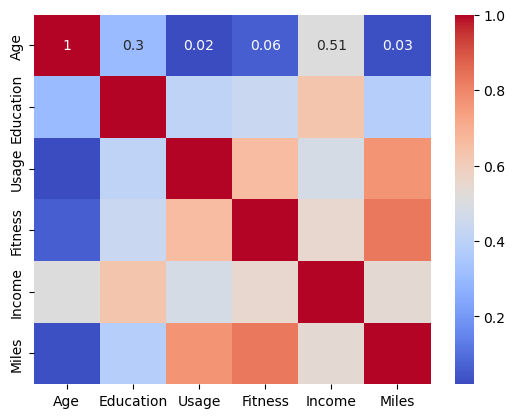

In [55]:
sns.heatmap(cor1.round(2), annot = True, cmap = 'coolwarm')
plt.show()

# Customer Profiling

## KP281
- Age: 23 to 33
- Income: 38000 to 54000
- Usage: 3 to 4 times a week
- Marital Status: Partnered are more likely to use KP281
- Gender: Both Male and female are equally using KP281

## KP481
- Age: 24 to 34
- Income: 45000 to 55000
- Usage: 3 to 3.5 times a week
- Marital Status: Partnered are more likely to use KP481
- Gender: Male are more likely to use KP481 as compared to Female

## KP781
- Age: 24 to 29
- Income: 60000 to 90000
- Usage: 4 to 5 times a week
- Marital Status: Partnered are more likely to use KP781
- Gender: The usage of KP781 is significantly higher among males compared to females, with 18% of males purchasing the product compared to only 3% of females.

# Analysis

- The majority of treadmill users fall within the age range of 23 to 35.
- KP281 is the most commonly purchased treadmill model, with 80% of buyers opting for it, followed by KP481 at 60%, and KP781 with only a 35% share.
- Across all three treadmill models, males make up the predominant buyer demographic.
- Treadmill purchasing tendencies correlate with income levels, with lower income individuals tending to opt for lower-tier treadmill models.

# Recommendations

- In the income bracket of 38000 to 54000, both demographics show a preference for KP281, resulting in lower sales of KP481.
- Enhancements in functionality or additional features could be incorporated into KP481.
- Offering special discounts targeted towards females could effectively stimulate sales within this demographic.
- Implementing targeted advertising campaigns aimed specifically at females would likely result in increased sales within this demographic.